### Word2Vec

This approach is an efficient solution which leverages the context of the target word. 
Word2Vec is a more recent model that embeds words in a lower-dimensional vector space using a shallow neural network.  
Essentially we want to use the surrounding words (or window) to represent target for Neural Network whose hidden layer encodes word representation.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from gensim.models import word2vec

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Making a corpus & dataframe

pd.options.display.max_colwidth = 200
corpus_df = pd.read_csv('bbc-text.csv')
corpus_df
corpus = np.array(corpus_df['text'])

In [3]:
# Normalizing the documents
stop_words = nltk.corpus.stopwords.words('english')

def normalize_doc(doc):
  # Removing the whitespaces, lowercasing

  doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()

  # Tokenizing the sentence
  tokens =  nltk.word_tokenize(doc)

  # Filtered Tokens

  filtered_tokens = [token for token in tokens if token not in stop_words]

  # recreate the document based on filtered tokens

  doc = ' '.join(filtered_tokens)

  return doc

In [4]:
normalize_corpus = np.vectorize(normalize_doc)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['tv future hands viewers home theatre systems plasma highdefinition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talkedabout technologies ces digital personal video recorders dvr pvr settop boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also builtin highdefinition tv sets big business japan us slower take europe lack highdefinition programming people forward wind adverts also forget abiding network channel schedules putting together alacarte entertainment us networks cable satellite companies worried means terms advertising r

There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,

 * The Continuous Bag of Words (CBOW) Model
 * The Skip-gram Model

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).   
Considering a simple sentence, “the quick brown fox jumps over the lazy dog”, this can be pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on.

In [5]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

In [6]:
feature_size = 100   # Word vector dimensionality  
window_context = 15  # Context window size                                                                                    
min_word_count = 25   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 0               # skip-gram model

In [7]:
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter= 100 , workers = 4)

In [8]:
print('The size of vocabulary: ', len(w2v_model.wv.vocab))

The size of vocabulary:  3395


In [9]:
w2v_model.wv.most_similar('football')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coach', 0.4085127115249634),
 ('apology', 0.3972059488296509),
 ('alex', 0.37030571699142456),
 ('sporting', 0.3353370428085327),
 ('racist', 0.3328787684440613),
 ('ferguson', 0.3254336416721344),
 ('game', 0.32078471779823303),
 ('federation', 0.3181648850440979),
 ('scottish', 0.31556540727615356),
 ('champions', 0.31351903080940247)]

In [10]:
w2v_model.wv.most_similar('country')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('turkish', 0.4311576187610626),
 ('history', 0.36189550161361694),
 ('world', 0.3617618680000305),
 ('civil', 0.32867228984832764),
 ('pointed', 0.3254113495349884),
 ('ukraine', 0.3246055841445923),
 ('government', 0.31992989778518677),
 ('britain', 0.31906402111053467),
 ('booming', 0.299314945936203),
 ('peace', 0.29710647463798523)]

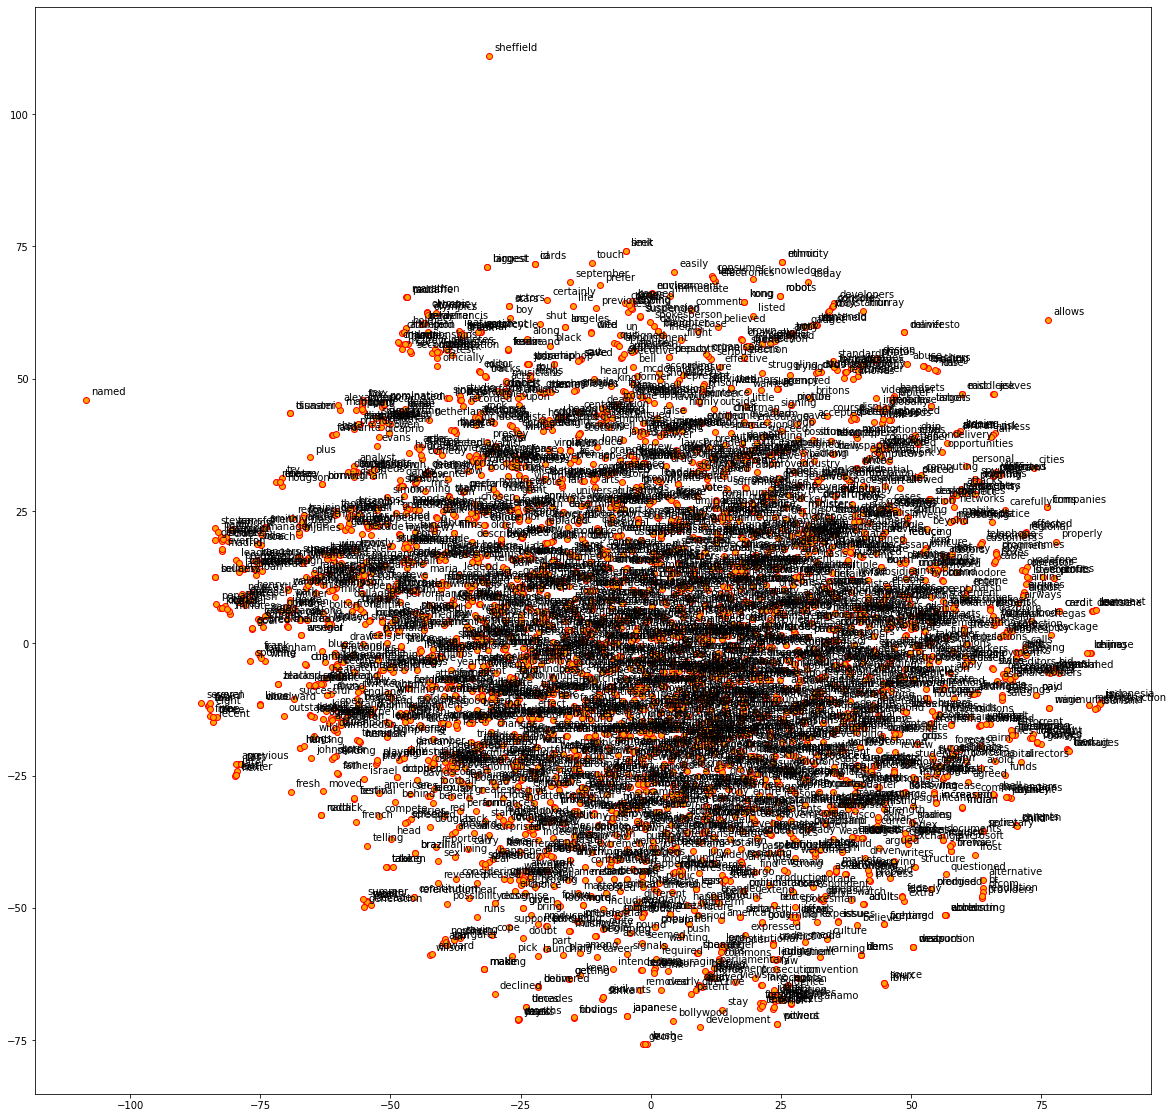

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter= 1000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 20))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')